In [1]:
import numpy as np

import logging
log = logging.getLogger()
log.setLevel("DEBUG")
from braindecode.scripts.train_experiments import setup_logging
setup_logging()

from braindecode.veganlasagne.layer_util import print_layers

import os

%load_ext autoreload
%autoreload 2

Using gpu device 0: GeForce GTX 780 (CNMeM is disabled, cuDNN 5005)
/home/hartmank/braindecode/vienv/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import receptive_field
import analysis
import utils

In [8]:
modelpath = '/home/hartmank/braindecode/data/models/'
modelname = 'paper/ours/cnt/deep4/car/22'
savepath  = '/home/hartmank/data/convvisual/RF_data/'
filename = 'Layer28.data'

In [9]:
RF_save = receptive_field.ReceptiveFieldInputsIO()
RF_save = RF_save.load(os.path.join(savepath,modelname,filename))

In [69]:
cl = 3
filt = 0

n_chans = RF_save.results[cl].n_chans
sampling_rate = RF_save.results[cl].sampling_rate
print RF_save.results[cl].max_filters

[3 2 1 0]


In [70]:
X_RF_cropped = utils.get_cropped_RF(RF_save.results[cl].RF_X,([0],[1],n_chans,-1))[filt]
window_indeces = np.unique(RF_save.results[cl].max_units_in_filters[filt][:,2])

In [71]:
classes = RF_save.classes
neg_classes = np.delete(classes,cl)

inputs_baseline = np.array([])
for c in neg_classes:
    inputs_baseline = np.vstack([inputs_baseline,RF_save.results[c].inputs]) if inputs_baseline.size else RF_save.results[c].inputs
X_baseline = utils.cut_ind_windows(inputs_baseline,X_RF_cropped.shape[2],window_indeces).squeeze()

In [72]:
neg_classes = [cl]

inputs_baseline = np.array([])
for c in neg_classes:
    inputs_baseline = np.vstack([inputs_baseline,RF_save.results[c].inputs]) if inputs_baseline.size else RF_save.results[c].inputs
X_baseline_same = utils.cut_ind_windows(inputs_baseline,X_RF_cropped.shape[2],window_indeces).squeeze()

In [73]:
#X_baseline = utils.cut_rand_windows(inputs_baseline,X_RF_cropped.shape[2],5).squeeze()

In [74]:
X_baseline.shape

(6480, 128, 522)

In [75]:
#feature_funcs = (analysis.get_frequency,analysis.get_frequency_change,analysis.get_offset,analysis.get_offset_change)

#FFT,FFTc,mean,meanc = utils.get_feature_vals(X_RF_cropped,feature_funcs,sampling_rate=sampling_rate)
#FFT_base,FFTc_base,mean_base,meanc_base = utils.get_feature_vals(X_baseline,feature_funcs,sampling_rate=sampling_rate)

#freqs_FFT = FFT.T[2][0]
#freqs_FFTc = FFTc.T[2][0]

#FFT = np.asarray(FFT.T[0].tolist())
#FFTc = np.asarray(FFTc.T[0].tolist())
#FFT_base = np.asarray(FFT_base.T[0].tolist())
#FFTc_base = np.asarray(FFTc_base.T[0].tolist())

In [76]:
#feat_means,feat_stds),b,names = analysis.feature_distributions([FFT,FFTc,mean,meanc],['FFT','FFTc','Mean','Meanc'])
#feat_stds = np.asarray(feat_stds)
#feat_means = np.asarray(feat_means)

#feat_means_base,feat_stds_base),b,names = analysis.feature_distributions([FFT_base,FFTc_base,mean_base,meanc_base],['FFT','FFTc','Mean','Meanc'])
#feat_stds_base = np.asarray(feat_stds_base)
#feat_means_base = np.asarray(feat_means_base)

#names = np.asarray(names)

In [77]:
feat_mean_diff_same,names,(FFT,FFTc,mean,meanc),(FFT_base,FFTc_base,mean_base,meanc_base) = utils.extract_fft_and_mean_diff(X_RF_cropped,X_baseline_same,sampling_rate)
feat_mean_diff,names,(FFT,FFTc,mean,meanc),(FFT_base,FFTc_base,mean_base,meanc_base) = utils.extract_fft_and_mean_diff(X_RF_cropped,X_baseline,sampling_rate)

Make sure this is tested!!
a (30, 128, 261)
a (30, 128, 130)
a (30, 128)
a (30, 128)
Make sure this is tested!!
a (2160, 128, 261)
a (2160, 128, 130)
a (2160, 128)
a (2160, 128)
Make sure this is tested!!
a (30, 128, 261)
a (30, 128, 130)
a (30, 128)
a (30, 128)
Make sure this is tested!!
a (6480, 128, 261)
a (6480, 128, 130)
a (6480, 128)
a (6480, 128)


In [78]:
#feat_mean_diff = np.abs(np.divide(feat_means_base-feat_means,feat_stds_base))
#feat_mean_diff = np.abs(np.divide(feat_means-feat_means_base,feat_stds))
feat_mean_diff_diff = feat_mean_diff-feat_mean_diff_same
sort_mean_diff_diff = feat_mean_diff_diff.argsort()[::-1]

In [79]:
print feat_mean_diff_diff[sort_mean_diff_diff[:20]]
print feat_mean_diff[sort_mean_diff_diff[:20]]
print feat_mean_diff_same[sort_mean_diff_diff[:20]]

[ 3.03900135  2.88404204  2.65178632  1.81264728  1.57896772  1.53923484
  1.53711993  1.5346045   1.44970692  1.4272807   1.41228497  1.40912389
  1.29761006  1.29168689  1.24447329  1.1713966   1.16953475  1.16099336
  1.05702756  1.04980466]
[ 4.4586321   4.14523573  3.9409973   2.83642792  2.47552172  3.01083205
  2.30877202  1.82761288  1.89422714  2.45923871  2.53469789  1.7704039
  2.32146255  1.74037108  2.0449467   1.99667311  1.5298571   2.00280356
  2.22987111  1.56594378]
[ 1.41963075  1.26119369  1.28921098  1.02378064  0.896554    1.4715972
  0.77165208  0.29300838  0.44452022  1.03195802  1.12241292  0.36128002
  1.02385248  0.44868418  0.80047341  0.82527651  0.36032234  0.8418102
  1.17284355  0.51613912]


In [80]:
print names[sort_mean_diff_diff[:20]].tolist()

['FFT_66_1', 'FFT_57_1', 'FFT_77_1', 'FFT_47_1', 'FFT_37_1', 'FFT_67_1', 'FFT_72_24', 'FFT_55_24', 'FFT_64_24', 'FFT_56_1', 'Meanc_66', 'FFT_65_24', 'Meanc_57', 'FFT_73_24', 'FFT_46_1', 'Meanc_77', 'FFT_44_24', 'Meanc_56', 'Meanc_47', 'FFT_54_24']


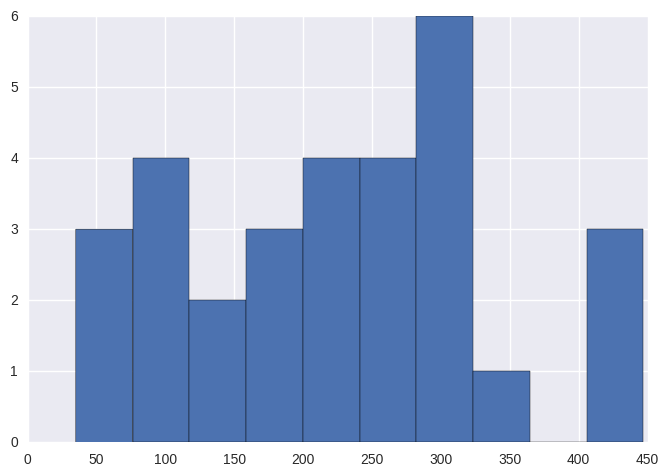

In [81]:
plt.hist(RF_save.results[cl].max_units_in_filters[filt][:,2])
plt.show()

(128,)


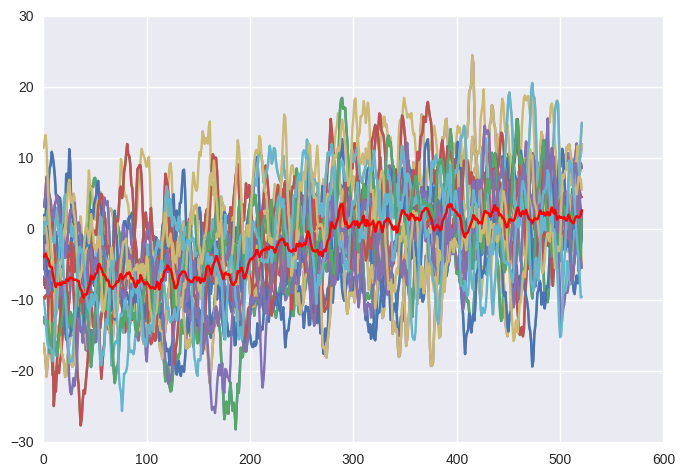

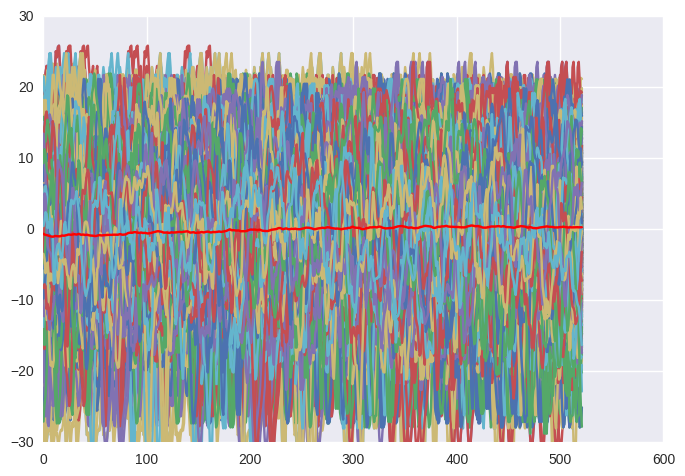

In [82]:
chan = 66
print X_RF_cropped[filt,:,chan].shape
plt.plot(X_RF_cropped[:,chan].T)
plt.plot(X_RF_cropped[:,chan].T.mean(axis=1),'red')
limits = plt.gca().get_ylim()
plt.show()

plt.plot(X_baseline[:,chan].T)
plt.plot(X_baseline[:,chan].T.mean(axis=1),'red')
plt.ylim(limits)
plt.show()

2.07882709449


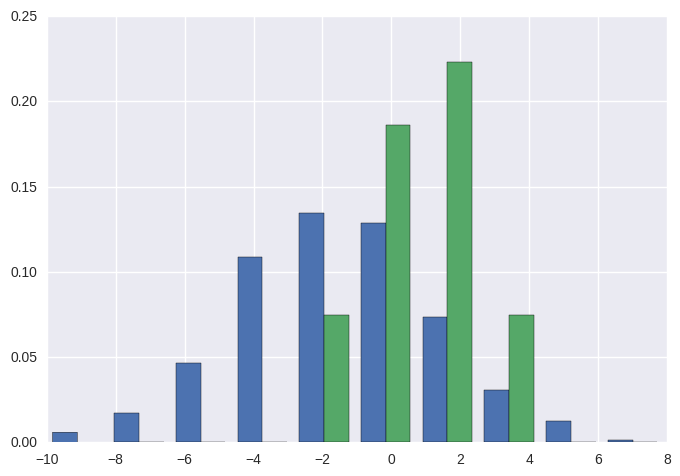

In [29]:
chan=37
print np.mean(mean[:,chan],axis=0)-np.mean(mean_base[:,chan],axis=0)
h = plt.hist([mean_base[:,chan],mean[:,chan]],normed=True)
plt.show()

7.67053469494


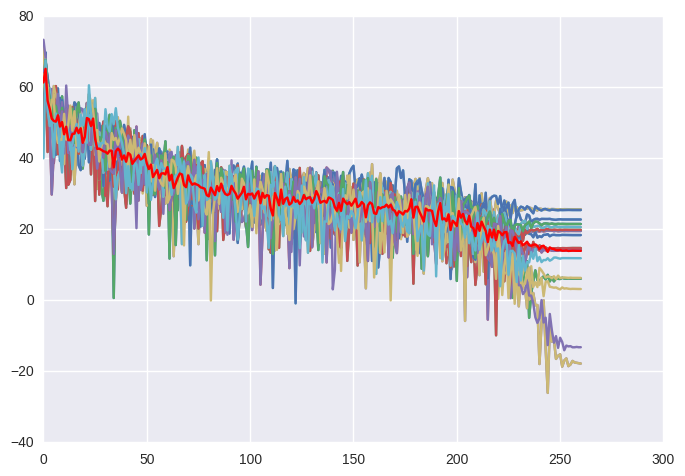

In [87]:
chan = 37
freq = 1
print np.mean(FFT[:,chan],axis=0)[freq]-np.mean(FFT_base[:,chan],axis=0)[freq]
X = range(FFT.shape[2])
plt.plot(X,FFT[:,chan].T)
plt.plot(X,np.mean(FFT[:,chan],axis=0).T,'red')
limits = plt.gca().get_ylim()
plt.show()
#plt.plot(X,FFT_base[:,chan].T)
#plt.plot(X,np.mean(FFT_base[:,chan],axis=0).T,'red')
#plt.ylim(limits)
#plt.show()

#plt.plot(X,(np.mean(FFT[:,chan],axis=0)-np.mean(FFT_base[:,chan],axis=0)).T)
#plt.show()

In [ ]:
chan=15
h = plt.hist([meanc_base[:,chan],meanc[:,chan]],normed=True)
plt.show()

-1.46670422542


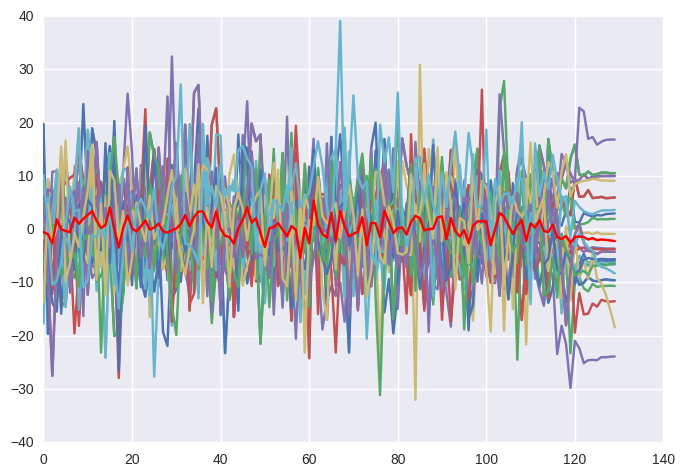

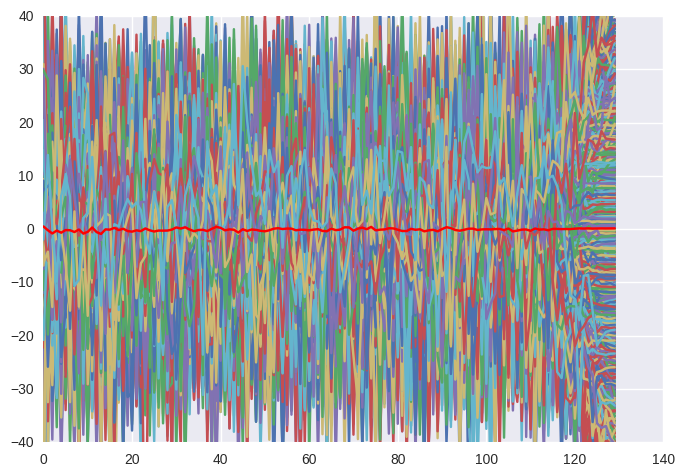

In [167]:
chan = 39
freq = 55
print np.mean(FFTc[:,chan],axis=0)[freq]-np.mean(FFTc_base[:,chan],axis=0)[freq]
plt.plot(FFTc[:,chan].T)
plt.plot(FFTc[:,chan].mean(axis=0).T,'red')
limits = plt.gca().get_ylim()
plt.show()
plt.plot(FFTc_base[:,chan].T)
plt.plot(FFTc_base[:,chan].mean(axis=0).T,'red')
plt.ylim(limits)
plt.show()

In [161]:
print np.asarray(['%d: %s'%(i,s) for i,s in enumerate(RF_save.results[cl].sensor_names)])
print np.asarray(['%d: %s'%(i,fr) for i,fr in enumerate(freqs_FFT)])

['0: Fp1' '1: Fpz' '2: Fp2' '3: AFp3h' '4: AFp4h' '5: AF7' '6: AF3'
 '7: AFz' '8: AF4' '9: AF8' '10: AFF5h' '11: AFF1' '12: AFF2' '13: AFF6h'
 '14: F7' '15: F5' '16: F3' '17: F1' '18: Fz' '19: F2' '20: F4' '21: F6'
 '22: F8' '23: FFT7h' '24: FFC5h' '25: FFC3h' '26: FFC1h' '27: FFC2h'
 '28: FFC4h' '29: FFC6h' '30: FFT8h' '31: FT9' '32: FT7' '33: FC5'
 '34: FC3' '35: FC1' '36: FCz' '37: FC2' '38: FC4' '39: FC6' '40: FT8'
 '41: FT10' '42: FTT9h' '43: FTT7h' '44: FCC5h' '45: FCC3h' '46: FCC1h'
 '47: FCC2h' '48: FCC4h' '49: FCC6h' '50: FTT8h' '51: FTT10h' '52: M1'
 '53: T7' '54: C5' '55: C3' '56: C1' '57: Cz' '58: C2' '59: C4' '60: C6'
 '61: T8' '62: M2' '63: TTP7h' '64: CCP5h' '65: CCP3h' '66: CCP1h'
 '67: CCP2h' '68: CCP4h' '69: CCP6h' '70: TTP8h' '71: TP7' '72: CP5'
 '73: CP3' '74: CP1' '75: CPz' '76: CP2' '77: CP4' '78: CP6' '79: TP8'
 '80: TPP9h' '81: TPP7h' '82: CPP5h' '83: CPP3h' '84: CPP1h' '85: CPP2h'
 '86: CPP4h' '87: CPP6h' '88: TPP8h' '89: TPP10h' '90: P9' '91: P7'
 '92: P5' '93

In [132]:
freqs_FFT

array([ 56.02873833,  56.94877256,  55.43541711,  55.26362698,
        55.26362698,  55.41978225,  66.03059401,  66.03059401,
        53.6867668 ,  53.6867668 ,  55.51097329,  54.75152424,
        62.76279454,  57.52146617,  43.95679467,  53.57782273,
        57.76486662,  62.96113795,  60.25213129,  60.81652974,
        54.68355874,  41.85300059,  63.71081307,  53.92860235,
        53.81203619,  63.9106498 ,  64.24375443,  61.90042037,
        60.11522462,  61.52370704])

In [42]:
FFT[:,chan].shape

(30, 261)